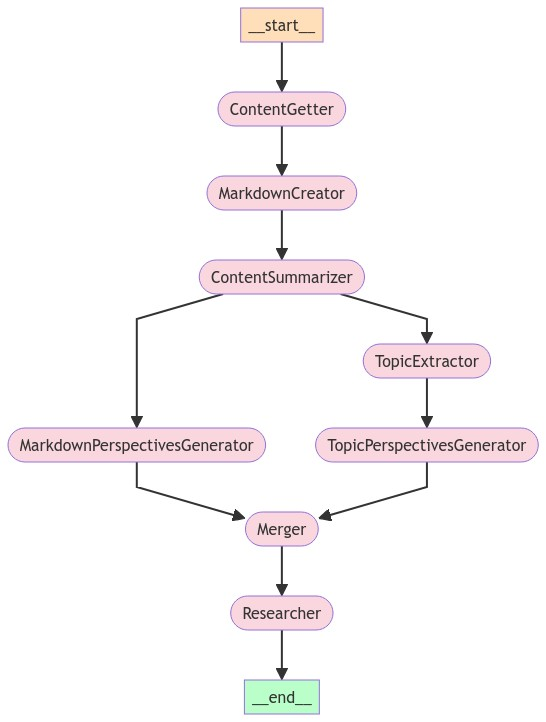

None
{'ContentGetter': {'content_text': '讓人們聞之色變的法家思想 曾提出了一個驚世駭俗的結論 他認為百姓根本分不清楚善惡 所謂的善惡只是某些人的工具 他認為百姓根本分不清楚好壞 所謂的好壞要由他們來決定 大家好我是白龍雪 今天要說的就是 法家的真相 在戰國時期 韓非子研究列國強弱的原因時 曾得出了一個極為冷門的結論 他說古秦之俗 君臣廢法而服私 是以國亂兵弱而主卑 這什麼意思呢 什麼是廢法而服私呢 在韓非看來 一群人之所以能組成一個部落 創建出一個國家 必然要遵守一些大家公認 且能夠執行的規則 這就像是班級中的班規 公司裏的制度一樣 所謂的廢法而服私 就是這個制度變成了擺設 決定權去了個人手裏 就是掌握法令的地方貴族 如果不願意懲罰一個人 那他就可以利用赦免的方式 給犯人一個改過自新的機會 如果這些貴族真的想要懲罰一個人 那他就可以用株連九族 酷刑連坐的方式 直接給這個犯人滿門抄斬 也就是說 判斷一個人是否觸犯了法令 不在於法令本身的條款 而在於他有沒有觸犯掌握法令的人 而且矛盾的就是 隨意的赦免某個人 百姓不會認為這是在貪贓枉法 反而還覺得貴族寬厚仁慈 體恤下情 隨意的屠殺某個人 百姓也不會認為這是嚴刑峻法 反而還覺得是這個犯人罪有應得 認為他是自討苦吃 為什麼會這樣呢 為什麼百姓分不清楚善惡呢 因為對什麼是善 什麼是惡的定義 從來就不需要參考尋常百姓的意見 他們只需要告訴百姓什麼是善 什麼是惡 只需要將觸犯法令的人 放在這個善惡的標準之中 只需要讓百姓看見他善 或者是惡的一面 這個概念可能有些難以理解 我們再換個說法 比如說有兩個人 一個是大家眼中的好人 善人 是當地遠近農民的慈善大家 另一個是大家眼中的壞人 惡人 是當地遠近農民的無業農民 如果這兩個人 都觸犯了同一條法令 接下來要面對相同的懲罰 很多人就會覺得不公平 因為在我們常識中認為 好人犯錯時另有隱情 善惡都要同罪同罰 那以後人們為什麼還要行善呢 說這樣只是看起來公平 實際上是最大的不公平 但問題就是 這個好壞是由誰來決定的呢 如果故事中的好人 背地裏做著傷天害理的勾當 只是一個道貌岸然的好人呢 如果故事中的壞人 背地裏做著樂善好施的行為 只是一個不善於表達的人呢 所以在韓非子看來 人心四海 深不可測 我們很難準確的 去判斷一個人的是非善惡 以人治代替法令 就必

ValidationError: 1 validation error for ChatOpenAI
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

In [43]:
from typing import Annotated, TypedDict, List, Dict, Union, ForwardRef
from langgraph.graph import END, StateGraph
from langchain_openai import ChatOpenAI
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain.schema import Document

from fake_useragent import UserAgent
from openai import OpenAI

import moviepy.editor as mp
import os
import json
import requests
import sqlite3
import tempfile

# 定义句子结构
class Sentence(TypedDict):
    sentence: str
    refs: List[str]

# 定义References结构
class References(TypedDict):
    key: str

# 定义SpicyEntities结构
class SpicyEntities(TypedDict):
    entity: str

# 定义内容结构
ContentSection = ForwardRef('ContentSection')

class ContentSection(TypedDict):
    section_title: str
    section_content: List[Sentence]
    subsections: List[ContentSection]

# 定义整个结构
class State(TypedDict):
    title: str
    url: str
    summary: str
    # content: List[ContentSection]
    # references: Dict[str, References]
    # spicy_entities: Dict[str, SpicyEntities]
    # flair_entities: List[str]
    # perspectives: Annotated[str, lambda x, y: f"{x}+{y}"]
    id: str
    content_text: str
    markdown:  Annotated[str, lambda x, y: f"{x}+{y}"]

DATABASE_PATH = '/Users/mins/Desktop/github/bilibili_summarize/db/sqlite/bilibili.db'
BASE_URL = '/Users/mins/Desktop/github/bilibili_summarize/static'
COOKIE_PATH = '/bilibili_summarize/cookie/cookie.json'


from src.tools.database import Database
from tool import GenerateMarkdown
db = Database(DATABASE_PATH)

def get_content_text(state: State):
    content_text = db.query('dynamic','content')[0][0]
    return {"content_text": content_text}

def generate_markdown(state: State):
    content_text = state['content_text']
    markdown = GenerateMarkdown().content_2_markdown(content_text)
    print(markdown)
    
    return {"markdown": markdown}

def summary_markdown(state: State):
    return {"markdown": "已完成"}

def get_topic(state: State):
    return {"markdown": "已完成"}

def get_markdown_perspectives(state: State):
    return {"markdown": "已完成"}

def get_topic_perspectives(state: State):
    return {"markdown": "已完成"}

def merge_perspectives(state: State):
    return {"markdown": "已完成"}

def search(state: State):
    return {"markdown": "已完成"}

workflow = StateGraph(State)
workflow.add_node("ContentGetter", get_content_text)
workflow.add_node("MarkdownCreator", generate_markdown)
workflow.add_node("ContentSummarizer", summary_markdown)
workflow.add_node("TopicExtractor", get_topic)
workflow.add_node("TopicPerspectivesGenerator", get_topic_perspectives)
workflow.add_node("MarkdownPerspectivesGenerator", get_markdown_perspectives)
workflow.add_node("Researcher", search)
workflow.add_node("Merger", merge_perspectives)
workflow.set_entry_point("ContentGetter")

workflow.add_edge("ContentGetter", "MarkdownCreator")
workflow.add_edge("MarkdownCreator", "ContentSummarizer")
workflow.add_edge("ContentSummarizer", "MarkdownPerspectivesGenerator")
workflow.add_edge("ContentSummarizer", "TopicExtractor")
workflow.add_edge("TopicExtractor", "TopicPerspectivesGenerator")
workflow.add_edge(["TopicPerspectivesGenerator", "MarkdownPerspectivesGenerator"], "Merger")
workflow.add_edge("Merger", "Researcher")
workflow.add_edge("Researcher", END)

# 编译工作流图
graph = workflow.compile()

from IPython.display import Image, display
print(display(Image(graph.get_graph().draw_mermaid_png())))

input = {
    "id":"BV1AS421N7Rc",
}
# 执行工作流图，流式输出
events = graph.stream(input)
for s in events:
    print(s)
    print("----")

In [16]:
import time
from typing import Annotated, TypedDict

from langgraph.checkpoint import MemorySaver
from langgraph.graph import StateGraph, END


class MyState(TypedDict):
    foo: Annotated[str, lambda x, y: f"{x}+{y}"]


def start(state: MyState):
    print(f"====== start: get {state} " + time.strftime("%H:%M:%S", time.localtime()))
    return {"foo": "s"}


def left_1(state: MyState):
    # time.sleep(3)
    print(f"====== L1: get {state} " + time.strftime("%H:%M:%S", time.localtime()))
    return {"foo": "L1"}


def right_1(state: MyState):
    print(f"====== R1: get {state} " + time.strftime("%H:%M:%S", time.localtime()))
    return {"foo": "R1"}


def right_2(state: MyState):
    print(f"====== R2: get {state} " + time.strftime("%H:%M:%S", time.localtime()))
    return {"foo": "R2"}


def right_3(state: MyState):
    print(f"====== R3: get {state} " + time.strftime("%H:%M:%S", time.localtime()))
    return {"foo": "R3"}


def merge(state: MyState) -> MyState:
    print(f"====== merge: get {state} " + time.strftime("%H:%M:%S", time.localtime()))
    return {"foo": "m"}


def main():
    graph = StateGraph(state_schema=MyState)

    graph.add_node(start)
    graph.add_node(left_1)
    graph.add_node(right_1)  # alt: try to add it earlier
    graph.add_node(right_2)
    graph.add_node(right_3)
    graph.add_node(merge)  # alt: try to add it earlier
    graph.set_entry_point("start")

    graph.add_edge("start", "left_1")
    graph.add_edge("start", "right_1")
    graph.add_edge("right_1", "right_2")
    graph.add_edge("right_2", "right_3")
    graph.add_edge(["left_1", "right_3"], "merge")
    graph.add_edge("merge", END)

    flow = graph.compile(checkpointer=MemorySaver())

    r = flow.invoke({"foo": ""}, config={"configurable": {"thread_id": "1"}})
    print(r["foo"])
    print("~~~~~~~~~~~~~~~~")

    config = {"configurable": {"thread_id": "1337"}}
    i = 1
    for s in flow.stream({"foo": ""}, config=config):
        print(f"---------- Stream step {i}")
        print(flow.get_state(config))
        print(s)
        print()
        i += 1
    print(flow.get_state(config))


if __name__ == '__main__':
    main()

====== start: get {'foo': '+'} 17:49:02
====== L1: get {'foo': '++s'} 17:49:02
====== R1: get {'foo': '++s'} 17:49:02
====== R2: get {'foo': '++s+L1+R1'} 17:49:02
====== R3: get {'foo': '++s+L1+R1+R2'} 17:49:02
====== merge: get {'foo': '++s+L1+R1+R2+R3'} 17:49:02
++s+L1+R1+R2+R3+m
~~~~~~~~~~~~~~~~
====== start: get {'foo': '+'} 17:49:02
---------- Stream step 1
StateSnapshot(values={'foo': '+'}, next=('start',), config={'configurable': {'thread_id': '1337', 'thread_ts': '1ef378f2-5e42-6776-8000-e7560d2fd6d7'}}, metadata={'source': 'loop', 'step': 0, 'writes': None}, created_at='2024-07-01T09:49:02.733492+00:00', parent_config=None)
{'start': {'foo': 's'}}

====== L1: get {'foo': '++s'} 17:49:02
====== R1: get {'foo': '++s'} 17:49:02
---------- Stream step 2
StateSnapshot(values={'foo': '++s'}, next=('left_1', 'right_1'), config={'configurable': {'thread_id': '1337', 'thread_ts': '1ef378f2-5e45-6b6a-8001-9712ea1df8be'}}, metadata={'source': 'loop', 'step': 1, 'writes': {'start': {'foo'